1、LDA
2、keras实现FastText
3、FastText调包

In [1]:
import os
import re
import jieba
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
root = 'data/百度题库/高中_历史/origin'

In [9]:
ancient_his = pd.read_csv(os.path.join(root, '古代史.csv'))
contemporary_his = pd.read_csv(os.path.join(root, '现代史.csv'))
modern_his = pd.read_csv(os.path.join(root, '近代史.csv'))

In [10]:
ancient_his.head(5)

,web-scraper-order,web-scraper-start-url,item
0,1566523436-2497,https://study.baidu.com/tiku,[题目]\n据《左传》记载，春秋后期鲁国大夫季孙氏的家臣阳虎独掌权柄后，标榜要替鲁国国君整肃...
1,1566523436-2506,https://study.baidu.com/tiku,[题目]\n秦始皇统一六国后创制了一套御玺。如任命国家官员，则封印“皇帝之玺”；若任命四夷的...
2,1566523436-2153,https://study.baidu.com/tiku,[题目]\n北宋加强中央集权的主要措施有（ ）\n①把主要将领的兵权收归中央②派文官担任...
3,1566523436-2328,https://study.baidu.com/tiku,[题目]\n商朝人崇信各种鬼神，把占卜、祭祀作为与神灵沟通的手段，负责通神事务的是商王和巫师...
4,1566523436-1914,https://study.baidu.com/tiku,[题目]\n公元963年，北宋政府在江淮地区设置了包括盐业管理，以及控制对茶叶销售的专卖等为...


In [11]:
ancient_his['label'] = '__label__古代史'
contemporary_his['label'] = '__label__现代史'
modern_his['label'] = '__label__近代史'

In [12]:
ancient_his.head(5)

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,[题目]\n据《左传》记载，春秋后期鲁国大夫季孙氏的家臣阳虎独掌权柄后，标榜要替鲁国国君整肃...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,[题目]\n秦始皇统一六国后创制了一套御玺。如任命国家官员，则封印“皇帝之玺”；若任命四夷的...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,[题目]\n北宋加强中央集权的主要措施有（ ）\n①把主要将领的兵权收归中央②派文官担任...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,[题目]\n商朝人崇信各种鬼神，把占卜、祭祀作为与神灵沟通的手段，负责通神事务的是商王和巫师...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,[题目]\n公元963年，北宋政府在江淮地区设置了包括盐业管理，以及控制对茶叶销售的专卖等为...,__label__古代史


In [58]:
stopwords_path = 'data/stopwords/哈工大停用词表.txt'

In [44]:
def clean_sentence(sentence):
    '''
    特殊符号去除
    :param sentence: 待处理的字符串
    :return: 过滤特殊字符后的字符串
    '''
    sentence = re.sub(r'[\s+\-\|\!\/\[\]\{\}_,.$%^*(+\"\')]+|[:：+——()?【】“”！，。？、~@#￥%……&*（）]+|题目|答案|知识点|解析|A|B|C|D', 
                      '', sentence)
    return jieba.cut(sentence, cut_all=False)

In [45]:
def load_stop_words(stop_word_path):
    '''
    加载停用词
    :param stop_word_path:停用词路径
    :return: 停用词表 list
    '''
    # 打开文件
    file = open(stop_word_path, 'r', encoding='utf-8')
    # 读取所有行
    stop_words = file.readlines()
    # 去除每一个停用词前后 空格 换行符
    stop_words = [stop_word.strip() for stop_word in stop_words]
    return stop_words

In [46]:
stopwords = load_stop_words(stopwords_path)
def sentence_proc(sentence):
    """
    预处理
    """
    words = clean_sentence(sentence)
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

In [47]:
%%time
ancient_his['item'] = ancient_his['item'].apply(sentence_proc)
contemporary_his['item'] = contemporary_his['item'].apply(sentence_proc)
modern_his['item'] = modern_his['item'].apply(sentence_proc)

CPU times: user 11.1 s, sys: 82.9 ms, total: 11.2 s
Wall time: 11.7 s


In [48]:
ancient_his.head(5)

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统六国 后 创制 套 御玺 命 国家 官员 封印 皇帝 玺命 四夷 官员 天子 玺 ...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主 措施 主领 兵权 收 中央 派 文官 担方 长官 设置 通判 监督...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商人 崇信 鬼神 占卜 祭祀 作 神灵 沟通 手段 负责 通神 事务 商王 巫师 出身 贵族...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 963 年 北宋 政府 江淮 区 设置 包括 盐业 理 控制 茶叶 销售 专卖 主 职...,__label__古代史


# 数据集合并

In [49]:
dataset_df = pd.concat([ancient_his, contemporary_his, modern_his])

# 1. LDA主题模型

> LDA是一种文档主题生成模型，也称为一个三层贝叶斯概率模型，包含词、主题和文档三层结构。
生成模型：我们认为一篇文章的每个词都是通过“以一定概率选择了某个主题，并从这个主题中以一定概率选择某个词语”这样一个过程得到。文档到主题服从多项式分布，主题到词服从多项式分布。

> LDA是一种非监督机器学习技术，可以用来识别大规模文档集（document collection）或语料库（corpus）中潜藏的主题信息。
* 采用了词袋的方法，把每一篇文档看做为一个词频向量；
* 每一篇文档代表了一些主题所构成的一个概率分布，而每一个主题又代表了很多单词所构成的一个概率分布。

In [50]:
common_texts = dataset_df['item'].apply(lambda x: x.split()).tolist()

In [51]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

dictionary = Dictionary(common_texts)

# 把文本转成词袋形式
corpus = [dictionary.doc2bow(text) for text in common_texts]

lda = LdaModel(corpus, id2word=dictionary, num_topics=3)

W0226 23:03:07.609061 4653073856 ldamodel.py:934] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


In [52]:
lda.print_topic(0, topn=50)

'0.013*"中国" + 0.011*"发展" + 0.010*"年" + 0.010*"材料" + 0.008*"纠错" + 0.008*"查看" + 0.008*"空间" + 0.008*"加入" + 0.008*"题型" + 0.008*"复制" + 0.008*"次数" + 0.008*"难度" + 0.008*"选题" + 0.008*"0" + 0.008*"单选题" + 0.008*"收藏" + 0.008*"篮" + 0.007*"不" + 0.007*"济" + 0.007*"般使" + 0.007*"项" + 0.006*"错误" + 0.006*"出现" + 0.006*"主义" + 0.006*"民族" + 0.006*"资" + 0.006*"中" + 0.005*"正确" + 0.004*"世界" + 0.004*"国家" + 0.004*"制度" + 0.004*"工业" + 0.003*"美国" + 0.003*"知识" + 0.003*"政治" + 0.003*"反映" + 0.003*"影响" + 0.003*"排" + 0.003*"世纪" + 0.003*"后" + 0.003*"符合" + 0.003*"考查" + 0.003*"世界市场" + 0.003*"近代" + 0.003*"时" + 0.003*"社会" + 0.003*"新" + 0.003*"说明" + 0.003*"政策" + 0.003*"工业革命"'

In [53]:
lda.print_topic(1, topn=50)

'0.014*"材料" + 0.010*"不" + 0.008*"篮" + 0.008*"收藏" + 0.008*"空间" + 0.008*"选题" + 0.008*"加入" + 0.008*"英国" + 0.008*"般使" + 0.008*"题型" + 0.008*"次数" + 0.008*"复制" + 0.008*"纠错" + 0.007*"难度" + 0.007*"查看" + 0.007*"单选题" + 0.007*"0" + 0.007*"思想" + 0.006*"中" + 0.006*"人" + 0.006*"项" + 0.005*"错误" + 0.005*"正确" + 0.005*"发展" + 0.005*"知识" + 0.004*"形成" + 0.004*"排" + 0.004*"符合" + 0.004*"考查" + 0.004*"议会" + 0.004*"中国" + 0.004*"题意" + 0.004*"体现" + 0.003*"时期" + 0.003*"法国" + 0.003*"反映" + 0.003*"世界" + 0.003*"确立" + 0.003*"社会" + 0.003*"结合" + 0.003*"政治" + 0.003*"国王" + 0.003*"学" + 0.003*"信息" + 0.003*"权力" + 0.003*"知" + 0.003*"主张" + 0.003*"关系" + 0.003*"民主" + 0.002*"国家"'

In [54]:
lda.print_topic(2, topn=50)

'0.013*"制度" + 0.012*"中国" + 0.010*"材料" + 0.010*"不" + 0.008*"难度" + 0.008*"0" + 0.008*"单选题" + 0.008*"加入" + 0.008*"次数" + 0.008*"篮" + 0.008*"收藏" + 0.008*"查看" + 0.007*"符合" + 0.007*"复制" + 0.007*"选题" + 0.007*"空间" + 0.007*"题型" + 0.007*"般使" + 0.007*"纠错" + 0.007*"正确" + 0.007*"题意" + 0.006*"政治" + 0.005*"发展" + 0.005*"考查" + 0.005*"项" + 0.005*"思想" + 0.004*"错误" + 0.004*"选项" + 0.004*"排" + 0.004*"知识" + 0.004*"皇帝" + 0.003*"中央" + 0.003*"中" + 0.003*"制" + 0.003*"济" + 0.003*"年" + 0.003*"时期" + 0.003*"出现" + 0.003*"体现" + 0.003*"反映" + 0.003*"学" + 0.003*"后" + 0.003*"知" + 0.003*"政策" + 0.003*"信息" + 0.002*"文化" + 0.002*"历史" + 0.002*"社会" + 0.002*"结合" + 0.002*"官制"'

In [55]:
len(dictionary.token2id)

35751

In [56]:
bow_sample = [(370, 1)]

In [57]:
lda.get_document_topics(bow_sample)

[(0, 0.17218345), (1, 0.63808906), (2, 0.18972749)]

# 2. FastText分类

In [59]:
max_features = 10000
class_num = 3
ngram_range = 1

## 数据集

In [60]:
dataset_df.head(5)

,web-scraper-order,web-scraper-start-url,item,label
0,1566523436-2497,https://study.baidu.com/tiku,左传 记载 春秋 后期 鲁国 大夫 季孙氏 家臣 阳虎 独掌 权柄 后 标榜 鲁国 国君 整...,__label__古代史
1,1566523436-2506,https://study.baidu.com/tiku,秦始皇 统六国 后 创制 套 御玺 命 国家 官员 封印 皇帝 玺命 四夷 官员 天子 玺 ...,__label__古代史
2,1566523436-2153,https://study.baidu.com/tiku,北宋 加强 中央集权 主 措施 主领 兵权 收 中央 派 文官 担方 长官 设置 通判 监督...,__label__古代史
3,1566523436-2328,https://study.baidu.com/tiku,商人 崇信 鬼神 占卜 祭祀 作 神灵 沟通 手段 负责 通神 事务 商王 巫师 出身 贵族...,__label__古代史
4,1566523436-1914,https://study.baidu.com/tiku,公元 963 年 北宋 政府 江淮 区 设置 包括 盐业 理 控制 茶叶 销售 专卖 主 职...,__label__古代史


In [61]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [63]:
corpus = dataset_df['item']

In [64]:
text_preprocesser = Tokenizer(num_words=max_features, oov_token='<UNK>')

In [65]:
text_preprocesser.fit_on_texts(corpus)

In [66]:
len(text_preprocesser.word_index)

35750

In [67]:
text_preprocesser.word_counts

OrderedDict([('左传', 12),
             ('记载', 193),
             ('春秋', 60),
             ('后期', 79),
             ('鲁国', 24),
             ('大夫', 44),
             ('季孙氏', 3),
             ('家臣', 6),
             ('阳虎', 2),
             ('独掌', 1),
             ('权柄', 2),
             ('后', 1567),
             ('标榜', 4),
             ('国君', 24),
             ('整肃', 2),
             ('跋扈', 5),
             ('举', 29),
             ('不知', 44),
             ('礼士', 1),
             ('赞成', 24),
             ('反受', 1),
             ('批评', 27),
             ('挑战', 97),
             ('宗法制度', 32),
             ('损害', 19),
             ('利益', 295),
             ('击', 143),
             ('天子', 132),
             ('权威', 99),
             ('不', 5279),
             ('符合', 2542),
             ('周礼', 28),
             ('规定', 373),
             ('题型', 4964),
             ('单选题', 4850),
             ('难度', 4994),
             ('般使', 4491),
             ('次数', 4973),
             ('0', 4799),
             

## 转换id

In [69]:
x = text_preprocesser.texts_to_sequences(corpus)
word_dict = text_preprocesser.word_index

## 保存字典

In [72]:
with open('data/vocab.txt', 'w', encoding='utf-8') as f:
    for k, v in word_dict.items():
        f.write(f'{k}\t{str(v)}\n')

## 标签编码

In [73]:
lb = LabelBinarizer()
lb.fit(dataset_df['label'])
print(lb.classes_)
y = lb.transform(dataset_df['label'])

['__label__古代史' '__label__现代史' '__label__近代史']


In [74]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

## 划分数据集

In [82]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

## 特征提取

In [76]:
def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.
    # >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}
    # >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.
    Example: adding bi-gram
    # >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    # >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    # >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]
    Example: adding tri-gram
    # >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    # >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    # >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)
    return np.array(new_sequences)

In [77]:
if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    for input_list in X_train:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)

    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting x_train and x_test with n-grams features
    X_train = add_ngram(X_train, token_indice, ngram_range)
    X_test = add_ngram(X_test, token_indice, ngram_range)

## Padding

In [83]:
print('Average train sequence length: {}'.format(np.mean(list(map(len, train_x)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, test_x)), dtype=int)))
maxlen=int(np.ceil(max(np.mean(list(map(len, train_x))),np.mean(list(map(len, test_x))))))
print('Average lenght:{}'.format(maxlen))

Average train sequence length: 120
Average test sequence length: 119
Average lenght:121


In [84]:
print('Pad sequences (samples x time)...')
train_x = sequence.pad_sequences(train_x, maxlen=maxlen, padding='post', truncating='post')
test_x = sequence.pad_sequences(test_x, maxlen=maxlen, padding='post', truncating='post')
print('x_train shape:', train_x.shape)
print('x_test shape:', test_x.shape)

Pad sequences (samples x time)...
x_train shape: (3976, 121)
x_test shape: (994, 121)


# FastText

> 1. 第一层是嵌入（Embedding）层。该层采用整数编码的词汇表，并查找每个词索引的嵌入向量（embedding vector）。这些向量是通过模型训练学习到的。向量向输出数组增加了一个维度。得到的维度为：(batch, sequence, embedding)。
2. 接下来，GlobalAveragePooling1D 将通过对序列维度求平均值来为每个样本返回一个定长输出向量。这允许模型以尽可能最简单的方式处理变长输入。
3. 最后一层与单个输出结点密集连接。使用 Sigmoid 激活函数，其函数值为介于 0 与 1 之间的浮点数，表示概率或置信度。

In [126]:
class FastText(object):
    def __init__(self, maxlen, max_features, embedding_dims, class_num, last_activation='sigmoid'):
        self.maxlen = maxlen
        self.max_features = max_features
        self.embedding_dims = embedding_dims
        self.class_num = class_num
        self.last_activation = last_activation
    
    def get_model(self):
        inputs = Input((self.maxlen,))
        embedding = Embedding(self.max_features, self.embedding_dims, input_length=self.maxlen)(inputs)
        x = GlobalAveragePooling1D()(embedding)
        output = Dense(self.class_num, activation=self.last_activation)(x)
        model = Model(inputs=inputs, outputs=output)
        return model

In [136]:
batch_size = 128
embedding_dims = 300
epochs = 20

In [137]:
print('Build model...')
model = FastText(maxlen, max_features, embedding_dims,class_num).get_model()
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Build model...
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 121)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 121, 300)          3000000   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 903       
Total params: 3,000,903
Trainable params: 3,000,903
Non-trainable params: 0
_________________________________________________________________


In [138]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    workers=32,
                    use_multiprocessing=True,
                    callbacks=[early_stopping],
                    validation_data=(test_x, test_y))

Train...
Train on 3976 samples, validate on 994 samples
Epoch 1/20
3976/3976 [==============================] - 2s 466us/sample - loss: 0.6612 - accuracy: 0.6886 - val_loss: 0.6237 - val_accuracy: 0.6911
Epoch 2/20
3976/3976 [==============================] - 1s 351us/sample - loss: 0.5909 - accuracy: 0.7135 - val_loss: 0.5678 - val_accuracy: 0.7284
Epoch 3/20
3976/3976 [==============================] - 1s 362us/sample - loss: 0.5396 - accuracy: 0.7477 - val_loss: 0.5231 - val_accuracy: 0.7384
Epoch 4/20
3976/3976 [==============================] - 1s 348us/sample - loss: 0.4894 - accuracy: 0.7691 - val_loss: 0.4732 - val_accuracy: 0.7740
Epoch 5/20
3976/3976 [==============================] - 1s 348us/sample - loss: 0.4368 - accuracy: 0.8125 - val_loss: 0.4284 - val_accuracy: 0.8052
Epoch 6/20
3976/3976 [==============================] - 1s 351us/sample - loss: 0.3906 - accuracy: 0.8407 - val_loss: 0.3947 - val_accuracy: 0.8192
Epoch 7/20
3976/3976 [==============================] - 

In [139]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix

In [140]:
results = model.evaluate(test_x, test_y, verbose=2)
print(results)

994/1 - 0s - loss: 0.3108 - accuracy: 0.8249
[0.3477595634983339, 0.8249497]


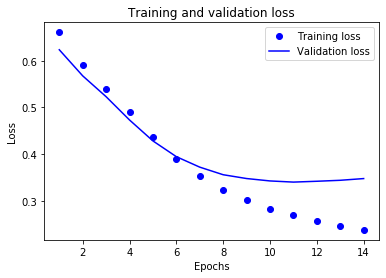

In [141]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [142]:
print('Test...')
pred_y = model.predict(test_x)
pred_y=pred_y.argmax(axis=1)
true_y=test_y.argmax(axis=1)
print('sequences 20 epochs max_features{} classification_report: \n'.format(max_features))
print(classification_report(true_y, pred_y))
print('sequences 20 epochs confusion_matrix: \n')
confusion_matrix(true_y, pred_y)

Test...
sequences 20 epochs max_features10000 classification_report: 

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       213
           1       0.69      0.80      0.74       451
           2       0.71      0.59      0.64       330

    accuracy                           0.74       994
   macro avg       0.78      0.75      0.76       994
weighted avg       0.75      0.74      0.74       994

sequences 20 epochs confusion_matrix: 



array([[180,  31,   2],
       [  9, 363,  79],
       [  4, 131, 195]])

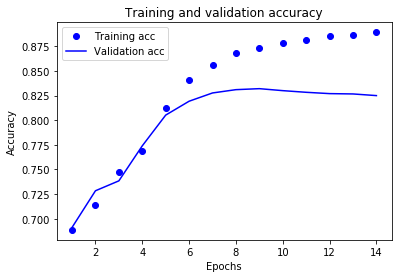

In [143]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 3.调包-FastText

https://github.com/facebookresearch/fastText

In [153]:
from fasttext import train_supervised

ModuleNotFoundError: No module named 'fasttext'

## 训练数据和测试数据划分

In [145]:
train_data, test_data=train_test_split(dataset_df[['label','item']],test_size=0.2,random_state=42)

## 保存数据

In [147]:
train_data_path='data/FastText/train_data.csv'
test_data_path='data/FastText/test_data.csv'

train_data.to_csv(train_data_path, index=None, header=None, sep=' ')
test_data.to_csv(test_data_path, index=None, header=None, sep=' ')

In [148]:
model = train_supervised(input=train_data_path, epoch=20, lr=1.0, wordNgrams=2, verbose=2, minCount=1)

NameError: name 'train_supervised' is not defined

## 评估

In [149]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

In [150]:
print_results(*model.test(test_data_path))

AttributeError: 'Model' object has no attribute 'test'

## 保存模型

In [151]:
model.save_model("data/FastText/model/his.bin")

AttributeError: 'Model' object has no attribute 'save_model'

## 量化

In [152]:
model.quantize(input=train_data_path, qnorm=True, retrain=True, cutoff=100000)
print_results(*model.test(test_data_path))
model.save_model("data/FastText/model/his.ftz")

AttributeError: 'Model' object has no attribute 'quantize'